In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

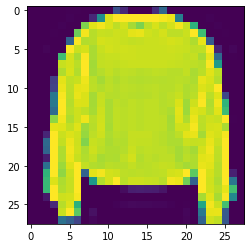

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[7])

**Normalize the data**

In [5]:
x_train=x_train/255.0
x_test=x_test/255.0

In [6]:
x_train[0].shape

(28, 28)

In [7]:
x_train=x_train.reshape(len(x_train),28,28,1)
x_test=x_test.reshape(len(x_test),28,28,1)

In [8]:
x_train.shape

(60000, 28, 28, 1)

In [9]:
def build_model(hp):
  model=keras.Sequential([
                          # adding first convolutional layer
                          keras.layers.Conv2D(
                              filters=hp.Int('con1_filter',min_value=65,max_value=130,step=15),
                              kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
                              activation='relu',
                              input_shape=(28,28,1),
                              kernel_initializer="he_uniform"),
                          # adding second convolutional layer 
                          keras.layers.Conv2D(
                              filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=15),
                              kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
                              #activation function
                              activation='relu',
                              kernel_initializer="he_uniform"),
                          #flatten layer
                          keras.layers.Flatten(),
                          #fully connected dense layer
                          keras.layers.Dense(
                            units=hp.Int('dense1_units', min_value=32, max_value=128, step=15),
                            activation='relu'),
                          #output layer
                          keras.layers.Dense(10,activation="softmax")])
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-3,1e-4])),
                                               loss="sparse_categorical_crossentropy",
                                               metrics=["accuracy"])
  return model

In [14]:
#importing random search
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
#creating randomsearch object

tuner = RandomSearch(build_model,
                    objective='val_accuracy',
                    max_trials = 5,directory='output',project_name="fashion mnist")
# search best parameter
tuner.search(x_train,y_train,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 00m 50s]
val_accuracy: 0.8410000205039978

Best val_accuracy So Far: 0.9045000076293945
Total elapsed time: 00h 05m 47s
INFO:tensorflow:Oracle triggered exit


In [17]:
model=tuner.get_best_models(num_models=1)[0]

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 95)        950       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 62)        147312    
_________________________________________________________________
flatten (Flatten)            (None, 30008)             0         
_________________________________________________________________
dense (Dense)                (None, 47)                1410423   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                480       
Total params: 1,559,165
Trainable params: 1,559,165
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(x_train,y_train,epochs=10,validation_split=0.1,initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.2092 - accuracy: 0.9235 - val_loss: 0.2767 - val_accuracy: 0.9007
Epoch 5/10
1688/1688 [==============================] - 18s 10ms/step - loss: 0.1770 - accuracy: 0.9355 - val_loss: 0.2876 - val_accuracy: 0.8997
Epoch 6/10
1688/1688 [==============================] - 18s 10ms/step - loss: 0.1496 - accuracy: 0.9459 - val_loss: 0.2573 - val_accuracy: 0.9125
Epoch 7/10
1688/1688 [==============================] - 17s 10ms/step - loss: 0.1260 - accuracy: 0.9545 - val_loss: 0.2741 - val_accuracy: 0.9083
Epoch 8/10
1688/1688 [==============================] - 17s 10ms/step - loss: 0.1042 - accuracy: 0.9632 - val_loss: 0.2738 - val_accuracy: 0.9118
Epoch 9/10
1688/1688 [==============================] - 18s 10ms/step - loss: 0.0861 - accuracy: 0.9693 - val_loss: 0.3064 - val_accuracy: 0.9097
Epoch 10/10
1688/1688 [==============================] - 18s 10ms/step - loss: 0.0707 - accuracy: 0.9762 - val_loss: 0.3236 

In [21]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3290 - accuracy: 0.9080


[0.3289893865585327, 0.9079999923706055]

In [22]:
y_pred=model.predict(x_test)

In [23]:
np.argmax(y_pred[1])

2

In [24]:
y_test


array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)